In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
from utils import *
from numpy.fft import fft2, ifft2, fftshift
from SALSA import SALSA
import pywt

In [2]:
img_ref = cv2.cvtColor( cv2.imread("images/cameraman.tif"), cv2.COLOR_BGR2GRAY)
M, N = img_ref.shape[:2]

In [3]:
# Blur kernel and operators

# uniform blur
h_1d = np.zeros(img_ref.shape[0],)
lh = 9
h_1d[:lh] = 1
h_1d = h_1d/h_1d.sum()
h_1d = cshift(h_1d,int(-(lh-1)/2) )
h_blur = np.outer(h_1d.transpose(), h_1d)

if 0:
    #Gaussian blur
    h_1d = np.zeros(img_ref.shape[0],)
    lh = 51
    h_1d[:lh] = np.divide( np.ones(lh,), (np.array( range(0,lh) )-((lh-1)/2.0) )**2+1 )
    h_1d = h_1d/h_1d.sum()
    h_1d = cshift(h_1d,int(-(lh-1)/2) )
    h_blur = np.outer(h_1d.transpose(), h_1d)

HF = fft2(h_blur)
HFC = np.matrix.conjugate(HF)

def A_op(x):
    YF = np.multiply(HF,fft2(x))
    #y = np.real( fftshift( ifft2(YF)) )
    y = np.real( ifft2(YF) )
    return y

def AT_op(x):
    YF = np.multiply(HF.conjugate(),fft2(x))
    #y = np.real( fftshift( ifft2(YF)) )
    y = np.real( ifft2(YF) )
    return y

In [4]:
SNRdb = 40
y = A_op( addGaussianNoise(img_ref, SNRdb) )

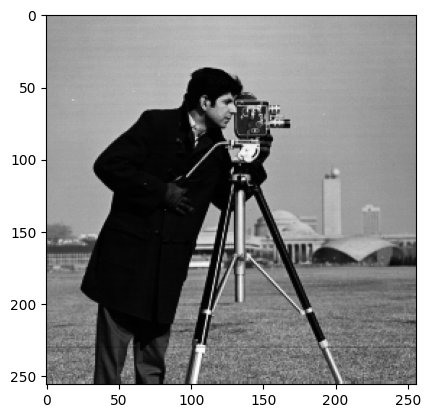

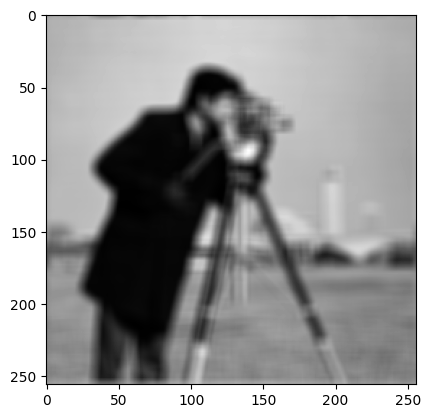

In [5]:
plt.figure(1)
plt.imshow(img_ref, cmap=plt.cm.gray)

plt.figure(2)
plt.imshow(y, cmap=plt.cm.gray)

In [6]:
num_levels = 3
wavelet_str = 'db2'

P = lambda x: wrapper_iswt2(x, wavelet_str, num_levels)
PT = lambda x: wrapper_swt2(x, wavelet_str, num_levels)

In [7]:
# parameters
lambda_reg = 0.2
mu = 5*lambda_reg
muinv = 1/mu
outeriters = 10000
tol = 1e-6

def invLS(x, mu):
    filter_FFT = np.divide( np.ones(y.shape), (np.abs(HF)**2 + mu) )
    return np.real( ifft2( np.multiply( filter_FFT,fft2(x) ) ) )

In [8]:
salsa_obj = SALSA( y, A_op, AT_op, invLS=invLS, tau=lambda_reg, P=P, PT=PT)

x, objective, times, distance, numA, numAt, mses = salsa_obj.predict(y, tau=lambda_reg,mu =mu,\
                                                                     stopCriterion=1,\
                                                                     x_true=img_ref,\
                                                                     x_init=2,
                                                                     MaxIt=outeriters,\
                                                                     tolA=tol,\
                                                                     verbose=1)
print ("ISNR is ",myISNR(img_ref,y,x ))

Initial value of objective function = 2.45e+07
iter= 0, obj= 1.13e+06, stop criterion= 1.00e+00, (target= 1.00e-06), MSE = 538.83
iter= 1, obj= 2.33e+07, stop criterion= 1.96e+01, (target= 1.00e-06), MSE = 493.31
iter= 2, obj= 2.32e+07, stop criterion= 5.68e-03, (target= 1.00e-06), MSE = 464.38
iter= 3, obj= 2.31e+07, stop criterion= 2.38e-03, (target= 1.00e-06), MSE = 444.07
iter= 4, obj= 2.31e+07, stop criterion= 6.98e-04, (target= 1.00e-06), MSE = 428.66
iter= 5, obj= 2.31e+07, stop criterion= 3.83e-05, (target= 1.00e-06), MSE = 416.28
iter= 6, obj= 2.31e+07, stop criterion= 3.62e-04, (target= 1.00e-06), MSE = 405.92
iter= 7, obj= 2.31e+07, stop criterion= 4.96e-04, (target= 1.00e-06), MSE = 396.97
iter= 8, obj= 2.31e+07, stop criterion= 5.41e-04, (target= 1.00e-06), MSE = 389.09
iter= 9, obj= 2.31e+07, stop criterion= 5.43e-04, (target= 1.00e-06), MSE = 382.02
iter= 10, obj= 2.31e+07, stop criterion= 5.24e-04, (target= 1.00e-06), MSE = 375.61
iter= 11, obj= 2.32e+07, stop criterion

iter= 99, obj= 2.34e+07, stop criterion= 1.87e-05, (target= 1.00e-06), MSE = 231.39
iter= 100, obj= 2.34e+07, stop criterion= 1.83e-05, (target= 1.00e-06), MSE = 230.85
iter= 101, obj= 2.34e+07, stop criterion= 1.79e-05, (target= 1.00e-06), MSE = 230.31
iter= 102, obj= 2.34e+07, stop criterion= 1.75e-05, (target= 1.00e-06), MSE = 229.78
iter= 103, obj= 2.34e+07, stop criterion= 1.70e-05, (target= 1.00e-06), MSE = 229.26
iter= 104, obj= 2.34e+07, stop criterion= 1.66e-05, (target= 1.00e-06), MSE = 228.74
iter= 105, obj= 2.34e+07, stop criterion= 1.63e-05, (target= 1.00e-06), MSE = 228.23
iter= 106, obj= 2.34e+07, stop criterion= 1.59e-05, (target= 1.00e-06), MSE = 227.73
iter= 107, obj= 2.34e+07, stop criterion= 1.56e-05, (target= 1.00e-06), MSE = 227.23
iter= 108, obj= 2.34e+07, stop criterion= 1.53e-05, (target= 1.00e-06), MSE = 226.74
iter= 109, obj= 2.34e+07, stop criterion= 1.50e-05, (target= 1.00e-06), MSE = 226.26
iter= 110, obj= 2.34e+07, stop criterion= 1.47e-05, (target= 1.00e

iter= 199, obj= 2.34e+07, stop criterion= 5.35e-06, (target= 1.00e-06), MSE = 198.69
iter= 200, obj= 2.34e+07, stop criterion= 5.31e-06, (target= 1.00e-06), MSE = 198.50
iter= 201, obj= 2.34e+07, stop criterion= 5.27e-06, (target= 1.00e-06), MSE = 198.31
iter= 202, obj= 2.34e+07, stop criterion= 5.21e-06, (target= 1.00e-06), MSE = 198.12
iter= 203, obj= 2.34e+07, stop criterion= 5.17e-06, (target= 1.00e-06), MSE = 197.93
iter= 204, obj= 2.34e+07, stop criterion= 5.14e-06, (target= 1.00e-06), MSE = 197.75
iter= 205, obj= 2.34e+07, stop criterion= 5.07e-06, (target= 1.00e-06), MSE = 197.56
iter= 206, obj= 2.34e+07, stop criterion= 5.04e-06, (target= 1.00e-06), MSE = 197.38
iter= 207, obj= 2.34e+07, stop criterion= 5.01e-06, (target= 1.00e-06), MSE = 197.20
iter= 208, obj= 2.34e+07, stop criterion= 4.97e-06, (target= 1.00e-06), MSE = 197.02
iter= 209, obj= 2.34e+07, stop criterion= 4.92e-06, (target= 1.00e-06), MSE = 196.84
iter= 210, obj= 2.34e+07, stop criterion= 4.88e-06, (target= 1.00

iter= 299, obj= 2.34e+07, stop criterion= 3.11e-06, (target= 1.00e-06), MSE = 185.28
iter= 300, obj= 2.34e+07, stop criterion= 3.10e-06, (target= 1.00e-06), MSE = 185.19
iter= 301, obj= 2.34e+07, stop criterion= 3.09e-06, (target= 1.00e-06), MSE = 185.10
iter= 302, obj= 2.34e+07, stop criterion= 3.07e-06, (target= 1.00e-06), MSE = 185.01
iter= 303, obj= 2.34e+07, stop criterion= 3.06e-06, (target= 1.00e-06), MSE = 184.92
iter= 304, obj= 2.34e+07, stop criterion= 3.04e-06, (target= 1.00e-06), MSE = 184.83
iter= 305, obj= 2.34e+07, stop criterion= 3.03e-06, (target= 1.00e-06), MSE = 184.74
iter= 306, obj= 2.34e+07, stop criterion= 3.02e-06, (target= 1.00e-06), MSE = 184.65
iter= 307, obj= 2.34e+07, stop criterion= 2.99e-06, (target= 1.00e-06), MSE = 184.57
iter= 308, obj= 2.34e+07, stop criterion= 2.97e-06, (target= 1.00e-06), MSE = 184.48
iter= 309, obj= 2.34e+07, stop criterion= 2.95e-06, (target= 1.00e-06), MSE = 184.39
iter= 310, obj= 2.34e+07, stop criterion= 2.94e-06, (target= 1.00

iter= 399, obj= 2.34e+07, stop criterion= 1.95e-06, (target= 1.00e-06), MSE = 178.51
iter= 400, obj= 2.34e+07, stop criterion= 1.94e-06, (target= 1.00e-06), MSE = 178.46
iter= 401, obj= 2.34e+07, stop criterion= 1.93e-06, (target= 1.00e-06), MSE = 178.41
iter= 402, obj= 2.34e+07, stop criterion= 1.92e-06, (target= 1.00e-06), MSE = 178.36
iter= 403, obj= 2.34e+07, stop criterion= 1.91e-06, (target= 1.00e-06), MSE = 178.32
iter= 404, obj= 2.34e+07, stop criterion= 1.90e-06, (target= 1.00e-06), MSE = 178.27
iter= 405, obj= 2.34e+07, stop criterion= 1.89e-06, (target= 1.00e-06), MSE = 178.22
iter= 406, obj= 2.34e+07, stop criterion= 1.88e-06, (target= 1.00e-06), MSE = 178.17
iter= 407, obj= 2.34e+07, stop criterion= 1.88e-06, (target= 1.00e-06), MSE = 178.12
iter= 408, obj= 2.34e+07, stop criterion= 1.87e-06, (target= 1.00e-06), MSE = 178.08
iter= 409, obj= 2.34e+07, stop criterion= 1.86e-06, (target= 1.00e-06), MSE = 178.03
iter= 410, obj= 2.34e+07, stop criterion= 1.86e-06, (target= 1.00

iter= 499, obj= 2.34e+07, stop criterion= 1.25e-06, (target= 1.00e-06), MSE = 174.73
iter= 500, obj= 2.34e+07, stop criterion= 1.24e-06, (target= 1.00e-06), MSE = 174.70
iter= 501, obj= 2.34e+07, stop criterion= 1.24e-06, (target= 1.00e-06), MSE = 174.67
iter= 502, obj= 2.34e+07, stop criterion= 1.23e-06, (target= 1.00e-06), MSE = 174.64
iter= 503, obj= 2.34e+07, stop criterion= 1.23e-06, (target= 1.00e-06), MSE = 174.62
iter= 504, obj= 2.34e+07, stop criterion= 1.22e-06, (target= 1.00e-06), MSE = 174.59
iter= 505, obj= 2.34e+07, stop criterion= 1.21e-06, (target= 1.00e-06), MSE = 174.56
iter= 506, obj= 2.34e+07, stop criterion= 1.20e-06, (target= 1.00e-06), MSE = 174.53
iter= 507, obj= 2.34e+07, stop criterion= 1.20e-06, (target= 1.00e-06), MSE = 174.50
iter= 508, obj= 2.34e+07, stop criterion= 1.20e-06, (target= 1.00e-06), MSE = 174.48
iter= 509, obj= 2.34e+07, stop criterion= 1.19e-06, (target= 1.00e-06), MSE = 174.45
iter= 510, obj= 2.34e+07, stop criterion= 1.19e-06, (target= 1.00

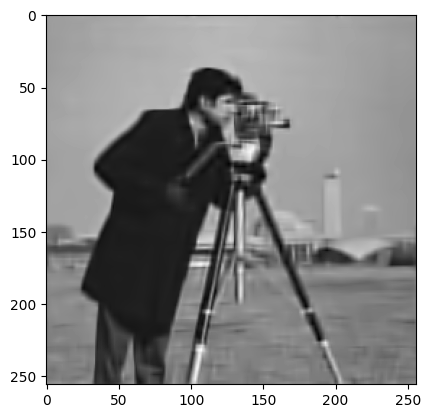

In [9]:
plt.imshow(x, cmap=plt.cm.gray)
plt.show()